#•	Data Loading

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              250 non-null    int64 
 1   Gender                  250 non-null    object
 2   Age                     250 non-null    int64 
 3   Annual Income (k$)      250 non-null    int64 
 4   Spending Score (1-100)  250 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.9+ KB
None
       CustomerID        Age  Annual Income (k$)  S

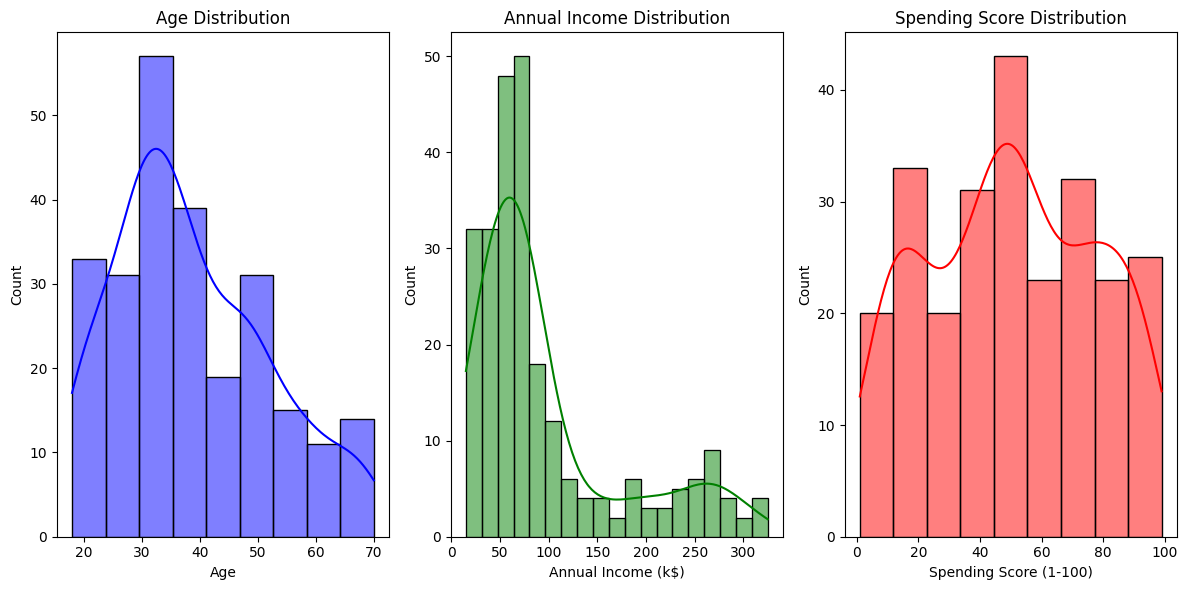

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    silhouette_score, calinski_harabasz_score, davies_bouldin_score,
    rand_score, mutual_info_score, v_measure_score, fowlkes_mallows_score
)
from pandas.plotting import parallel_coordinates

data = pd.read_csv('/content/Mall_Customers.csv')

# Check the first few rows and general information
print(data.head())
print(data.info())
print(data.describe())

import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of Age, Annual Income, and Spending Score before preprocessing
plt.figure(figsize=(12, 6))

# Age distribution
plt.subplot(1, 3, 1)
sns.histplot(data['Age'], kde=True, color='blue')
plt.title('Age Distribution')

# Annual Income distribution
plt.subplot(1, 3, 2)
sns.histplot(data['Annual Income (k$)'], kde=True, color='green')
plt.title('Annual Income Distribution')

# Spending Score distribution
plt.subplot(1, 3, 3)
sns.histplot(data['Spending Score (1-100)'], kde=True, color='red')
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

#•	Preprocessing

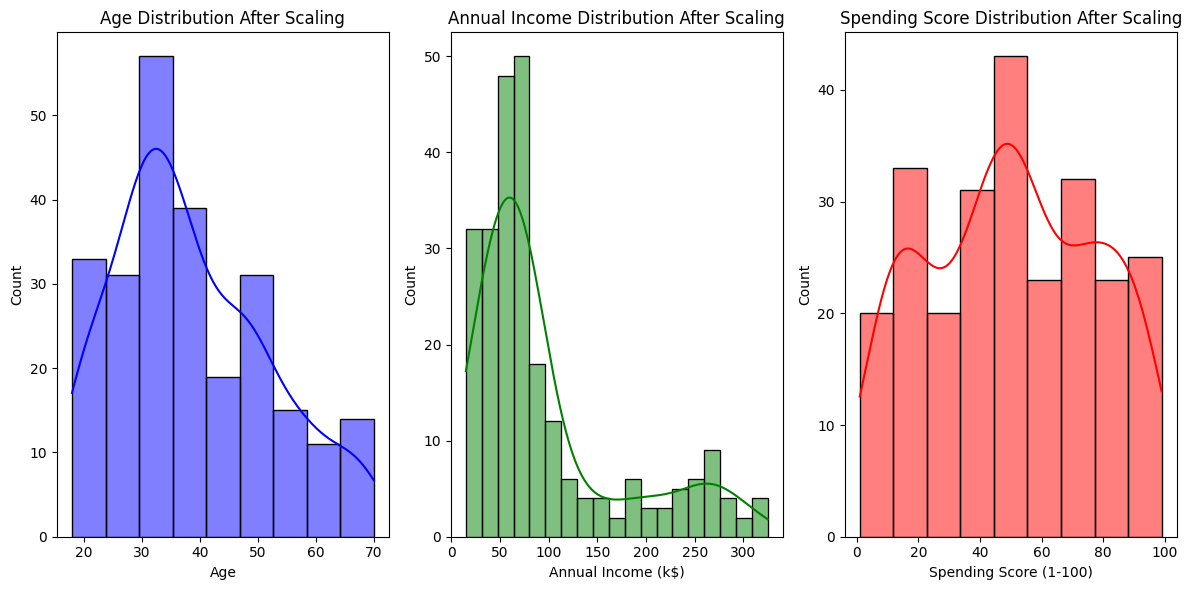

In [2]:
data = data.dropna().drop_duplicates()

data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Feature selection (Age, Annual Income, Spending Score)
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Visualize the scaled data after preprocessing
plt.figure(figsize=(12, 6))

# Age distribution after scaling
plt.subplot(1, 3, 1)
sns.histplot(data['Age'], kde=True, color='blue')
plt.title('Age Distribution After Scaling')

# Annual Income distribution after scaling
plt.subplot(1, 3, 2)
sns.histplot(data['Annual Income (k$)'], kde=True, color='green')
plt.title('Annual Income Distribution After Scaling')

# Spending Score distribution after scaling
plt.subplot(1, 3, 3)
sns.histplot(data['Spending Score (1-100)'], kde=True, color='red')
plt.title('Spending Score Distribution After Scaling')

plt.tight_layout()
plt.show()

#•	Finding Optimal K

Text(0, 0.5, 'Inertia')

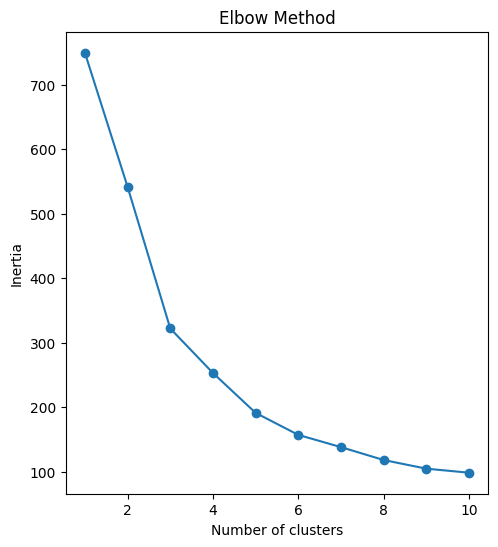

In [3]:
# Finding Optimal K using Elbow Method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

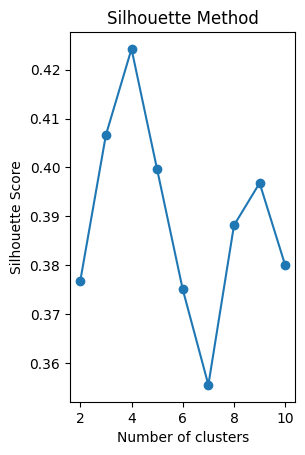

In [4]:
# Silhouette Method
silhouette_scores = []
for k in K[1:]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

plt.subplot(1, 2, 2)
plt.plot(K[1:], silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

#•	Found Optimal K = 6

In [5]:
optimal_k = 6 #From Silhouette Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(scaled_data)

#•	Clustering with two features

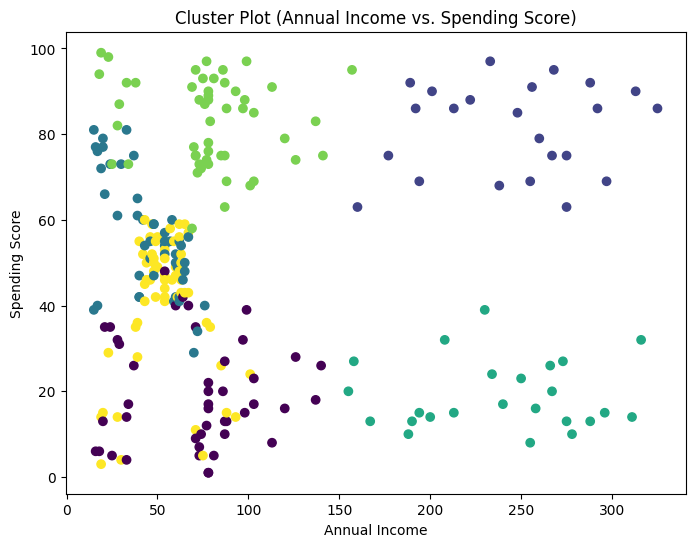

In [6]:
# Cluster Plot for Two Features (Annual Income vs. Spending Score)
plt.figure(figsize=(8, 6))
plt.scatter(features['Annual Income (k$)'], features['Spending Score (1-100)'], c=labels, cmap='viridis')
plt.title('Cluster Plot (Annual Income vs. Spending Score)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

#•	Clustering with three features

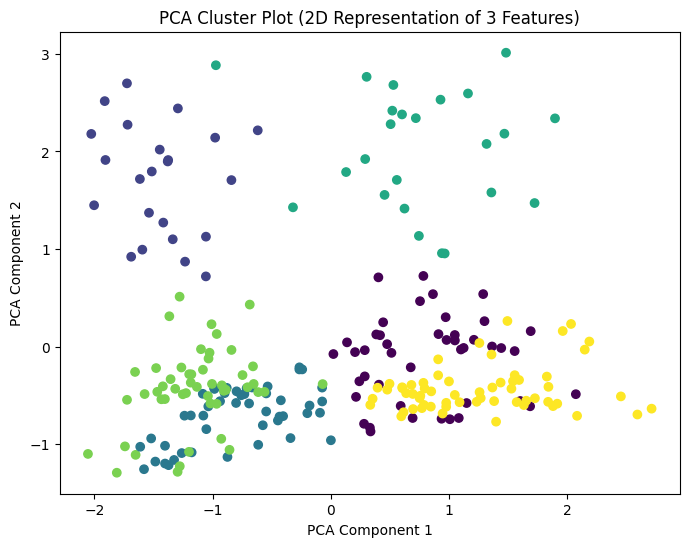

In [7]:
# Cluster Plot for Three Features (Using PCA for 2D Visualization)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
plt.title('PCA Cluster Plot (2D Representation of 3 Features)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

#• Parallel Coordinates Plot



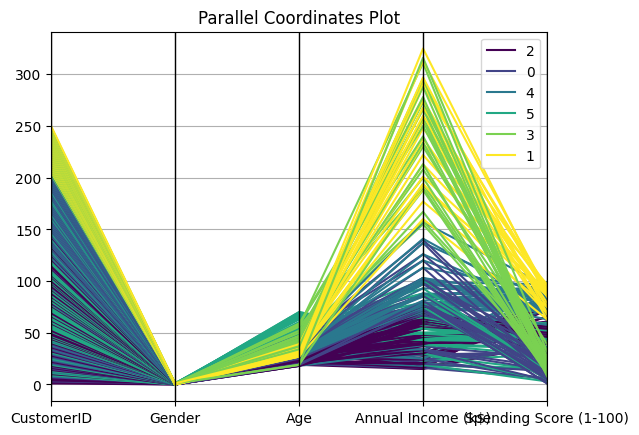

In [8]:
# Parallel Coordinates Plot
data['Cluster'] = labels
parallel_coordinates(data, 'Cluster', colormap='viridis')
plt.title('Parallel Coordinates Plot')
plt.show()

#•	Analysis

In [9]:
# Analysis
true_labels = np.zeros(len(data))

# Extrinsic Measures
rand_index = rand_score(true_labels, labels)
mutual_info = mutual_info_score(true_labels, labels)
v_measure = v_measure_score(true_labels, labels)
fowlkes_mallows = fowlkes_mallows_score(true_labels, labels)

print(f"Rand Index: {rand_index}")
print(f"Mutual Information: {mutual_info}")
print(f"V-measure: {v_measure}")
print(f"Fowlkes-Mallows Score: {fowlkes_mallows}")

# Intrinsic Measures
silhouette_avg = silhouette_score(scaled_data, labels)
calinski_harabasz = calinski_harabasz_score(scaled_data, labels)
davies_bouldin = davies_bouldin_score(scaled_data, labels)

print(f"Silhouette Coefficient: {silhouette_avg}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")
print(f"Davies-Bouldin Index: {davies_bouldin}")

Rand Index: 0.18146184738955823
Mutual Information: 0.0
V-measure: 0.0
Fowlkes-Mallows Score: 0.42598338863101015
Silhouette Coefficient: 0.37506368278585334
Calinski-Harabasz Index: 184.54671381199282
Davies-Bouldin Index: 0.9124918288392924
